In [1]:
import numpy as np
import math
import pandas as pd
import copy
import matplotlib.pyplot as plt

from numpy import linalg as LA
from tqdm import tqdm
from decimal import Decimal

In [2]:
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Задание 2 
### Работа Закировой Марфы, Б06-906а
## XI.9.3a  
Построить алгоритм метода пристрелки для вычисления
решения следующей нелинейной задачи:

$$
\left\{\begin{array}{cc}
y^{\prime \prime}-x \sqrt{y}=0, & 0 \leq x \leq 1 \\
y(0)=0, \quad y(1)=2
\end{array}\right.
$$

Для каждого $\alpha$ будем решать задачу Коши:
$$
\left\{\begin{array}{cc}
y^{\prime \prime}= x \sqrt{y}, & 0 \leq x \leq 1 \\
y(0)=0, \quad y^{\prime}(0)=\alpha
\end{array}\right.
$$
Полученное решение $y^*$ в точке 1 будем сравнивать со значением 2 и уточнять $\alpha$ для следующих задач Коши, пока $|y^{*}(1) - 2| > \varepsilon$ <br>

$$
\left\{\begin{array}{cc}
y^{\prime}= z & 0 \leq x \leq 1 \\
z^{\prime} =  x \sqrt{y}\\
y(0)=0, \quad z(0)=\alpha
\end{array}\right.
$$

Попробуем решить задачу явным методом Эйлера:
$$
\begin{equation*} u_{n+1} = u_n + \tau f(t_n, u_{n}),  0 \leqslant t \leqslant N-1 \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned}\frac{1}{h}(y(x_n+h) - y(x_n)) = z(x_n) \\ \frac{1}{h} (z(x_n+h) - z(x_n)) = x_n  \sqrt{y(x_n)} \end{aligned} \right.  \Rightarrow \end{equation*} 

\begin{equation*}\left\{\begin{aligned} y(x_n+h)\frac{1}{h} = y(x_n) \frac{1}{h} + z(x_n)  \\z(x_n+h)\frac{1}{h}  = z(x_n)\frac{1}{h} +  x_n  \sqrt{y(x_n)}\end{aligned} \right. \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned} y_{n+1} = y_n  + z_{n} h \\ 
z_{n+1} = z_n + h x_n  \sqrt{y_n} \end{aligned} \right.  \end{equation*}
$$

In [3]:
def koshi(alpha):
    global step, x0, x1

    x_n = 0
    y_n = 0
    z_n = alpha
    dots = np.arange(x0,x1,step)
    res = [[y_n, z_n]]

    for i in range(1, len(dots)):
        prev =copy.deepcopy([x_n, y_n, z_n])
        y_n += step*prev[-1]
        z_n += step * prev[0] * np.sqrt(prev[1])
        x_n += step

        res.append([y_n, z_n])
    return np.array(res)[:,0]

def ugol(alpha, psi, algo):
    res = algo(alpha)
    return res[-1] - psi

def delta_ugol(alpha,psi, alpha_step, algo):
    return (ugol(alpha + alpha_step, psi, algo)-ugol(alpha, psi, algo))/alpha_step

def pristrelka(alpha = 1e-4, eps = 1e-4, alpha_step = 1e-4, algo = koshi):
    global step, psi

    alpha_prev = alpha
    alpha -= ugol(alpha, psi, algo)/delta_ugol(alpha, psi, alpha_step, algo)
    if np.any(np.abs(alpha - alpha_prev) > eps):
        return pristrelka(alpha, algo=algo)
    else:
        return algo(alpha)
            



In [6]:
x0 = 0
x1 = 1
psi = 2
step = 1e-4
pristrelka()

array([0.00000000e+00, 1.84323808e-04, 3.68647617e-04, ...,
       1.99952055e+00, 1.99976027e+00, 2.00000000e+00])

---

## X.9.3
Рассматривается задача вида
$$
\frac{d^2 x}{d t^2}-\mu\left(1-\left(\frac{d x}{d t}\right)^2\right) \frac{d x}{d t}+x=0 .
$$
Решить задачу, записав уравнение в виде системы ОДУ. Начальные условия: $x(0)=0, \dot{x}(0)=0,001, \mu=1000, T_k=1000$. 
<br>
Решение<br>
$$
\left\{\begin{array}{cc}
x^{\prime} = y \\
y^{\prime} = \mu*(1-y^2)*y - x
\end{array}\right.
$$
$x(0) = 0, y(0) = 0.001,\quad t\in [0,T_k]$

Будем решать методом Рунге-Кутты для систем, методом Дорманда-Принса :

$$
\begin{aligned}
& k_1=h f\left(t_k, y_k\right) \\
& k_2=h f\left(t_k+\frac{1}{5} h, y_k+\frac{1}{5} k_1\right) \\
& k_3=h f\left(t_k+\frac{3}{10} h, y_k+\frac{3}{40} k_1+\frac{9}{40} k_2\right) \\
& k_4=h f\left(t_k+\frac{4}{5} h, y_k+\frac{44}{45} k_1-\frac{56}{15} k_2+\frac{32}{9} k_3\right) \\
& k_5=h f\left(t_k+\frac{8}{9} h, y_k+\frac{19372}{6561} k_1-\frac{25360}{2187} k_2+\frac{64448}{6561} k_3-\frac{212}{729} k_4\right) \\
& k_6=h f\left(t_k+h, y_k+\frac{9017}{3168} k_1-\frac{355}{33} k_2-\frac{46732}{5247} k_3+\frac{49}{176} k_4-\frac{5103}{18656} k_5\right) \\
& k_7=h f\left(t_k+h, y_k+\frac{35}{384} k_1+\frac{500}{1113} k_3+\frac{125}{192} k_4-\frac{2187}{6784} k_5+\frac{11}{84} k_6\right)
\end{aligned}
$$

Для метода 4го порядка:
$$
y_{k+1}=y_k+\frac{35}{384} k_1+\frac{500}{1113} k_3+\frac{125}{192} k_4-\frac{2187}{6784} k_5+\frac{11}{84} k_6 .
$$

5го, его и будем вычислять:
$$
z_{k+1}=y_k+\frac{5179}{57600} k_1+\frac{7571}{16695} k_3+\frac{393}{640} k_4-\frac{92097}{339200} k_5+\frac{187}{2100} k_6+\frac{1}{40} k_7
$$

In [9]:
def func(t, u, mu = 1000):
    return np.array([u[1], mu * (1 - u[1] ** 2) * u[1] - u[0]])

    
def dormand_prince(func, t, u, h):
    k1 = h * func(t, u)
    k2 = h * func(t + (1/5)*h, u + (1/5)*k1)
    k3 = h * func(t + (3/10)*h, u + (3/40)*k1 + (9/40)*k2)
    k4 = h * func(t + (4/5)*h, u + (44/45)*k1 - (56/15)*k2 + (32/9)*k3)
    k5 = h * func(t + (8/9)*h, u + (19372/6561)*k1 - (25360/2187)*k2 + (64448/6561)*k3 - (212/729)*k4)
    k6 = h * func(t + h, u + (9017/3168)*k1 - (355/33)*k2 - (46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5)
    k7 = h * func(t + h, u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6)

    y = u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6
    z = u + (5179/57600)*k1 + (7571/16695)*k3 + (393/640)*k4 - (92097/339200)*k5 + (187/2100)*k6 + (1/40)*k7
    
    return z


x0 = 0
y0 = 0.001
u0 = np.array([x0,y0])


t = 0
max_time = 1000
h = 1e-5
N = int(max_time/h)

res_dp = [u0]
time = [0]
u = u0

for j in tqdm(range(N)):
    u = dormand_prince(func, t, u, h)
    res_dp.append(u)
    t += h
    time.append(t)

res_dp = np.array(res_dp)

plt.plot(time, res_dp[:, 0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Зависимость решения от времени')
plt.show()

: 

: 

In [ ]:
def func(u, mu = 1000):
    return np.array([u[1], mu * (1 - u[1] ** 2) * u[1] - u[0]])


def coef(u, step):
    f = func(u)
    k = [f[0]]
    m = [f[1]]

    f = func(u + step * np.array([k[-1], m[-1]])/2)
    k.append(f[0])
    m.append(f[1])

    f = func(u + step * np.array([k[-1], m[-1]])/2)
    k.append(f[0])
    m.append(f[1])
    
    f = func(u + step * np.array([k[-1], m[-1]]))
    k.append(f[0])
    m.append(f[1])
    return (k,m)
    

def rk(val,step, max_time):
    cur_t = 0
    res = [val]
    times = [cur_t]
    while cur_t < max_time:
        
        prev = val.copy()
        k, m = coef(val, step)

        val[0] += step*(k[0] + 2*k[1] + 2*k[2] + k[3]) /6
        val[1] += step*(m[0] + 2*m[1] + 2*m[2] + m[3]) /6
        cur_t += step
        
        times.append(cur_t)
        res.append(val)
        
    return np.array(times),np.array(res)


In [79]:
step = 1e-4
val = np.array([0,0.001])
times, res = rk(val, step, 1000)

plt.scatter(times, res[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Зависимость решения от времени')
plt.show()

KeyboardInterrupt: 

**Попробуем решить задачу явным методом Эйлера:**
$$
\begin{equation*} u_{n+1} = u_n(t) + \tau f(t_n, u_{n}),  0 \leqslant t \leqslant N-1 \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned}\frac1\tau(x(t+\tau) - x(t)) = y(t) \\\frac1\tau (y(t+\tau) - y(t)) = \mu*(1-y(t)^2)*y(t) - x(t) \end{aligned} \right.  \Rightarrow \end{equation*} 

\begin{equation*}\left\{\begin{aligned} x(t+\tau)\frac1\tau = x(t) \frac1\tau + y(t)  \\y(t+\tau)\frac1\tau  = \mu*(1-y(t)^2)*y(t) - x(t) + y(t)\frac1\tau \end{aligned} \right. \Rightarrow \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned} x_{n+1} = x_n  + \tau y_{n} \\ 
y_{n+1} = \tau \mu*(1-y_n^2)*y_n - \tau x_n + y_n \end{aligned} \right.  \end{equation*}
$$

In [ ]:
t0 = 0
t1 = 1000
mu = 1000

x_n = 0
y_n = 0.001
step = 1e-4

dots = np.arange(0,1000,step)
res = [[x_n, y_n]]

for i in tqdm(range(1, len(dots))):
    prev =[x_n, y_n].copy()
    x_n += step*y_n
    y_n += step * (mu * (1-y_n**2)*y_n - x_n)

    res.append([x_n, y_n])
res = np.array(res)


100%|██████████| 9999999/9999999 [00:12<00:00, 792441.51it/s] 


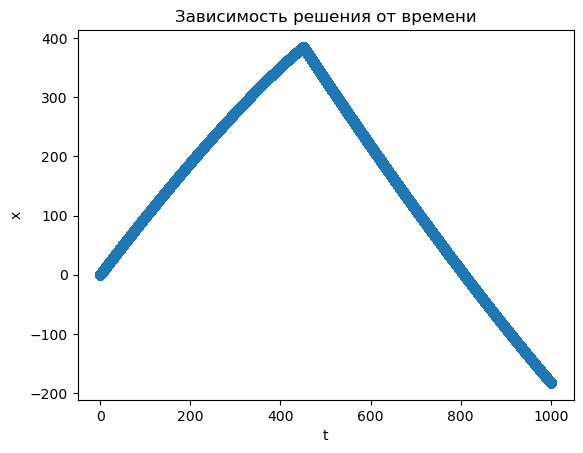

In [ ]:
plt.scatter(dots, res[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Зависимость решения от времени')
plt.show()


**Я считаю метод решения явным методом менее вырожденным**

---

## Т4
Решить краевую задачу
$$
\begin{gathered}
y^{\prime \prime}+\left(x^2-2\right) y^{\prime}-\left(x^2-2\right) \cos x \cdot y
=e^x x^2 \cos x+2+2 x^3-x^4+2 x^2 \\
y(0)=0 \quad y(\pi)=\pi^2
\end{gathered}
$$
Ответ представить в виде вывода значения функции в 6 точках $\{0.5$, $1,1.5,2,2.5,3\}$

* Попробуем решить методом прогонки

<img src="дз2.3.jpeg" width="550">



<img src="дз2.3.jpeg" width="550">

In [ ]:
def func(x,h):
    a = 1+h*(x - 2)
    b = -2 - (x**2 - 2)*(np.cos(x)*(h**2)+h)
    c = 1
    return (a, b, c)


###### не понадобилось в ручную вычислять коэффициенты, так как решаю систему из пакета

# def coef(p_prev, q_prev, x_curr): 
#     a,b,c,d = func(x_curr)
#     p = -c/(a*p_prev + b)
#     q = (d - a*q_prev)/(a*p_prev + b)
#     return (p,q)

# def y_val(p_last,q_last, y_last):
#     return p_last*y_last + q_last


0
first index of problem: 1
0
first index of problem: 1
0
first index of problem: 1


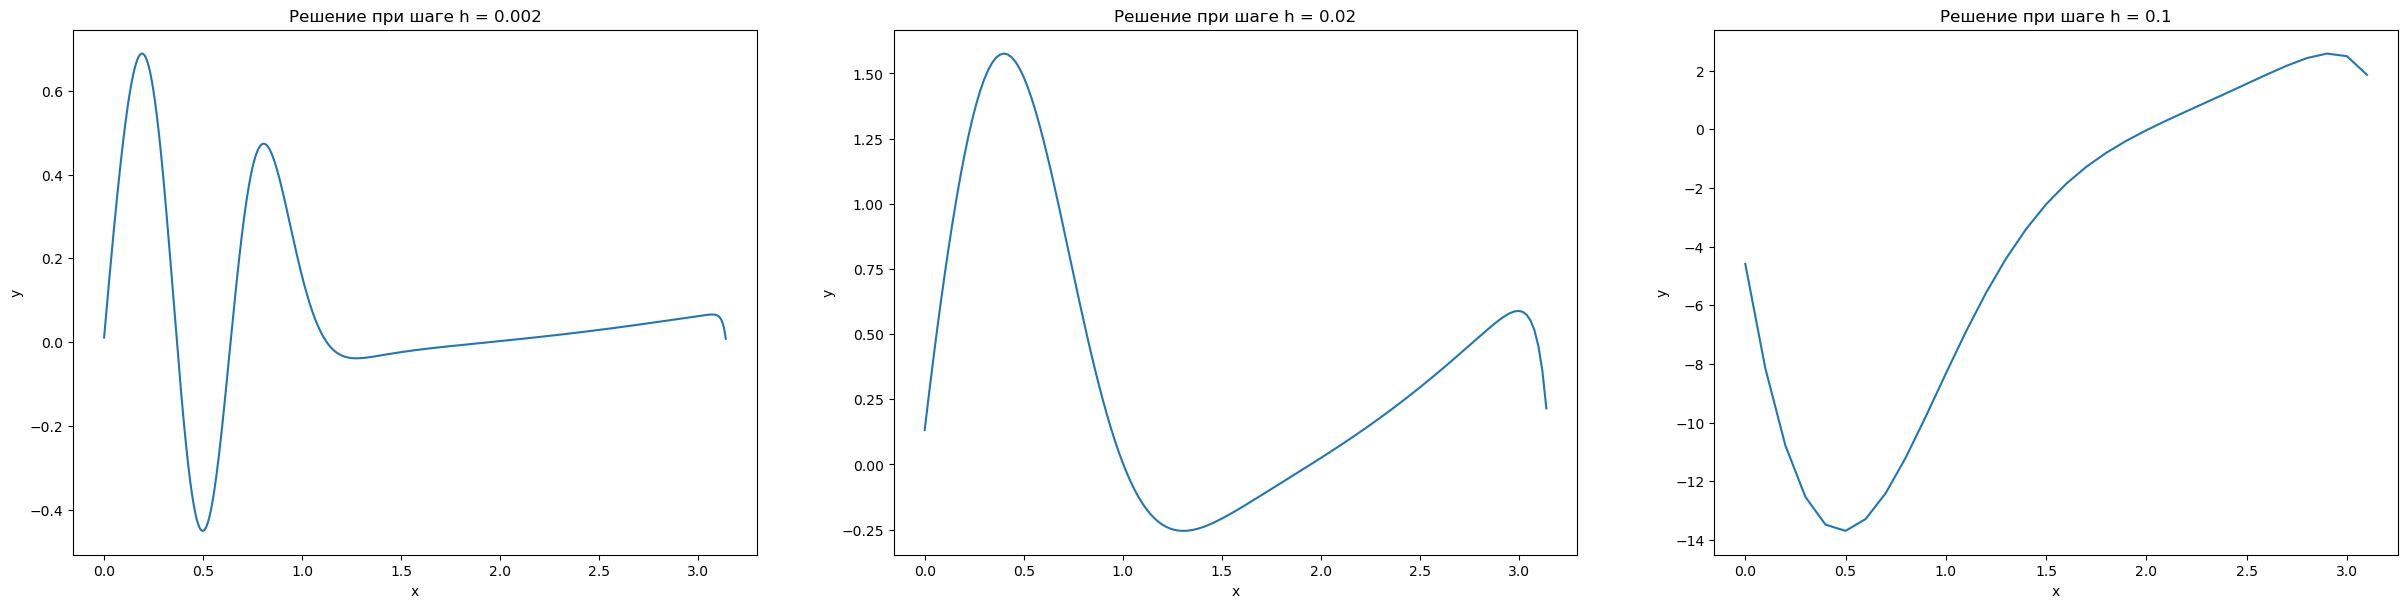

In [ ]:
plt.figure(figsize=(30,15))
for j, h in enumerate([0.002, 0.02, 0.1]): #шаг такой мелкости, чтобы искомые 6 точек попали в массив значений на котором будет считаться алгоритм прогонки
    t = np.arange(0,np.pi, h)
    n = len(t)
    
    A = np.zeros((n,n))
    A[0,0] = -2 + 2*(h**2+h)
    A[0,1] = 1
    for i in range(1,n-1):
        abc = func(t[i],h)
        A[i, i] = abc[1]
        A[i, i-1] = abc[0]
        A[i, i+1] = abc[2]
    A[n-1,n-1] = -2 - (np.pi**2 - 2)*(np.cos(np.pi)*(h**2)+h)
    A[n-1, n-2] = 1+h*(np.pi - 2)

    f = [h**2 *(np.exp(x) * x**2 * np.cos(x) + 2 + 2*x**3 - x**4 + 2* x**2) for x in t]

    y = LA.solve(A, f)

## проверка достаточного уcловия

    for i in range(len(A)):
        if np.abs(A[i, i]) < np.abs(A[i, i-1]) + np.abs(A[i, i+1]):
            print(f'first index of problem: {i}')
            break
        if np.abs(A[i, i]) > np.abs(A[i, i-1]) + np.abs(A[i, i+1]):
            print(i)       

    ax = plt.subplot(2, 3, j+1)
    ax.plot(t, y, label=h)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title(f'Решение при шаге h = {h}')



Достаточное условие алгоритма прогонки не выполнено, возможно метод не устойчив, также видим не усточивость решения в зависимости от шага сетки h. 
* Попробуем решить методом пристрелки

$$
\left\{\begin{array}{cc}
y^{\prime}= z & 0 \leq x \leq \pi \\
z^{\prime} =  (x^2 - 2) cos(x) y - z(x^2-2)+ e^x x^2 cos(x) + 2 +2x^3 -x^4+2x^2\\
y(0)=0, \quad z(0)=\alpha
\end{array}\right.
$$

Попробуем решить задачу явным методом Эйлера:
$$
\begin{equation*} u_{n+1} = u_n + \tau f(t_n, u_{n}),  0 \leqslant t \leqslant N-1 \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned}
\frac{1}{h}(y(x_n+h) - y(x_n)) = z(x_n) \\ 
\frac{1}{h} (z(x_n+h) - z(x_n)) = (x_n^2 - 2) cos(x_n) y_n - z_n(x_n^2-2)+ e^x_n x_n^2 cos(x_n) + 2 +2x_n^3 -x_n^4+2x_n^2
\end{aligned} \right. \end{equation*} 
$$

$$
\begin{equation*}\left\{\begin{aligned} 
y_{n+1} = y_n  + z_{n} h \\ 
z_{n+1} = z_n(1 - h(x_n^2 -2)) + h(cos(x_n)y_n(x_n^2-2) + e^x x_n^2 cos(x_n) +2 +2x_n^2 +2x_n^3 - x_n^4 )
\end{aligned} \right.  \end{equation*}

In [ ]:
def koshi2(alpha):
    global step, x0, x1

    x_n = 0
    y_n = 0
    z_n = alpha
    dots = np.arange(x0,x1,step)
    res = [[y_n, z_n]]

    for i in range(1, len(dots)):
        prev =copy.deepcopy([x_n, y_n, z_n])
        y_n += step*prev[-1]
        z_n = prev[-1] * (1 - step*(prev[0]**2 - 2)) + step * ((prev[0]**2 - 2)*np.cos(prev[0])*prev[1] + np.exp(prev[0]) * prev[0]**2 * np.cos(prev[0]) + 2 + 2 * prev[0]**2 + 2* prev[0]**3 - prev[0]**4)
        x_n += step
        res.append([y_n, z_n])
    return np.array(res)[:,0]


решение в точках при h = 1.0E-4  [ 3.56421727 11.17828625 23.50373437 35.32289851 33.30155083 15.74461537]
решение в точках при h = 1.0E-5  [ 3.56594022 11.18306944 23.51226325 35.33281578 33.30862803 15.74884888]


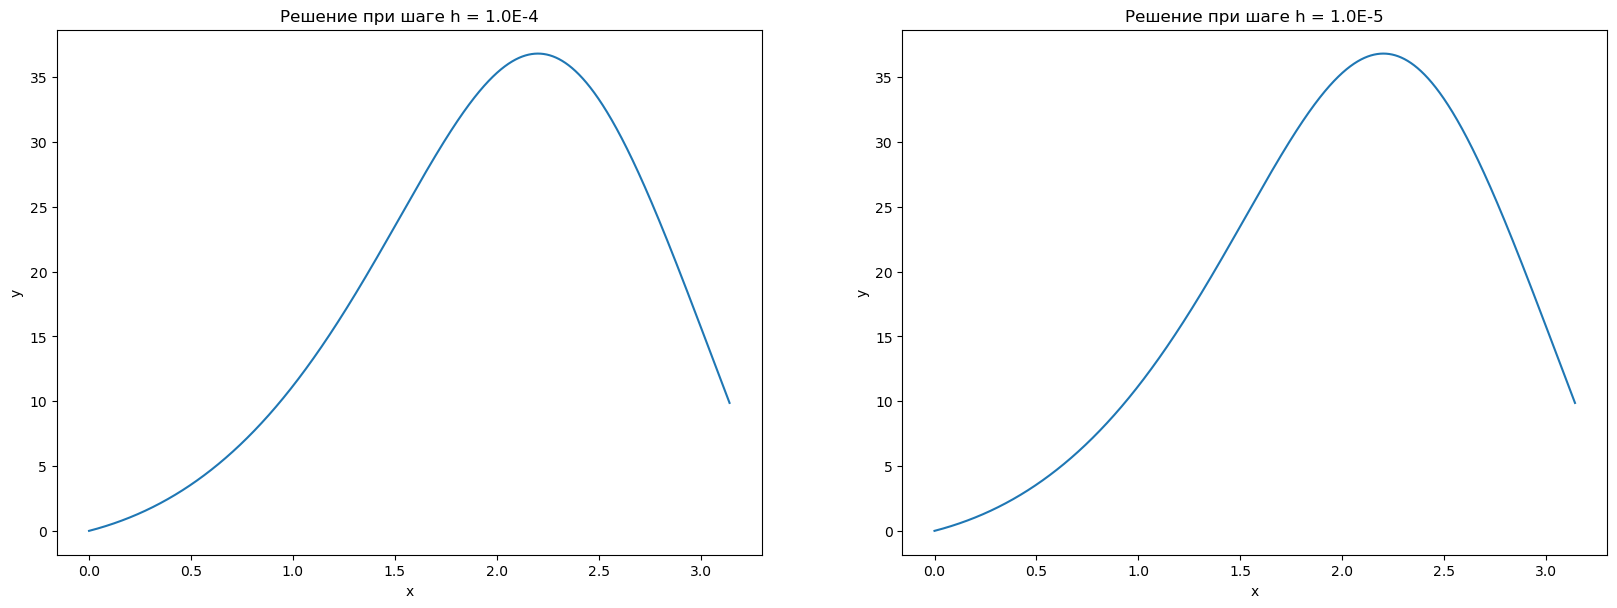

In [ ]:
x0 = 0
x1 = np.pi
psi = np.pi**2
exp = [0.5,1,1.5,2,2.5,3]

plt.figure(figsize = (20,15))
for j,step in enumerate([1e-4, 1e-5]):
    dots = np.arange(x0,x1,step)
    ind = []
    res = pristrelka(algo =koshi2)

    for i,x_n in enumerate(dots):
        for t in exp:
            if abs(x_n-t)< step/2:
                ind.append(i)
    print(f'решение в точках при h = {Decimal(step):.1E} ', res[ind])

    ax = plt.subplot(2, 2, j+1)
    ax.plot(dots, res)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title(f'Решение при шаге h = {Decimal(step):.1E}')

---

## T5
Решить краевую задачу методами пристрелки и квазилинеаризации
$$
\begin{gathered}
\left(y^{\prime \prime}\right)^2+e^{y \prime} y-\frac{e}{\ln x} y^2=\frac{1}{x^2} \\
y(e)=e \quad y(e^2)=2e^2
\end{gathered}
$$
Ответ представить в виде вывода значения функции в точках $\{3, 3.5, 4, 4.5, 6\}$ <br>


* Сначала решим методом пристрелки <br>
Так как $y(e), y(e^2) \geqslant 0$, то раскроем квадрат с '+':

$$
\left\{\begin{array}{cc}
y^{\prime}= z & e \leq x \leq e^2 \\
z^{\prime} =  \sqrt{\frac{1}{x^2}+\frac{y^2 e}{ln(x)}-e^z y}\\
y(e)=e, \quad z(e)=\alpha
\end{array}\right.
$$

Попробуем решить задачу явным методом Эйлера:
$$
\begin{equation*} u_{n+1} = u_n + \tau f(t_n, u_{n}),  0 \leqslant t \leqslant N-1 \end{equation*}  
$$
$$
\begin{equation*}\left\{\begin{aligned}
\frac{1}{h}(y(x_n+h) - y(x_n)) = z(x_n) \\ 
\frac{1}{h} (z(x_n+h) - z(x_n)) = \sqrt{\frac{1}{x_n^2}+\frac{y(x_n)^2 e}{ln(x_n)}-e^{z(x_n)} y(x_n)}
\end{aligned} \right. \end{equation*} 
$$

$$
\begin{equation*}\left\{\begin{aligned} 
y_{n+1} = y_n  + z_{n} h \\ 
z_{n+1} = z_n + h \sqrt{\frac{1}{x_n^2}+\frac{y_n^2 e}{ln(x_n)}-e^{z_n} y_n}
\end{aligned} \right.  \end{equation*}


In [ ]:
def koshi3(alpha):
    global step, x0, x1, y0

    x_n = x0
    y_n = y0
    z_n = alpha
    dots = np.arange(x0,x1,step)
    res = [[y_n, z_n]]

    for i in range(1, len(dots)):
        prev =copy.deepcopy([x_n, y_n, z_n])
        y_n += step*prev[-1]
        z_n += step*np.sqrt( 1/(prev[0]**2)+(prev[1]**2 * np.e)/(np.log(prev[0])) - prev[1]*np.exp(prev[-1]))
        x_n += step
        res.append([y_n, z_n])
    return np.array(res)[:,0]

решение в точках при h = 1.0E-4  [ 3.29595369  4.38479817  5.54531385  6.76849173 10.75071554]
решение в точках при h = 1.0E-5  [ 3.295851    4.38468545  5.54519322  6.76836464 10.75057438]


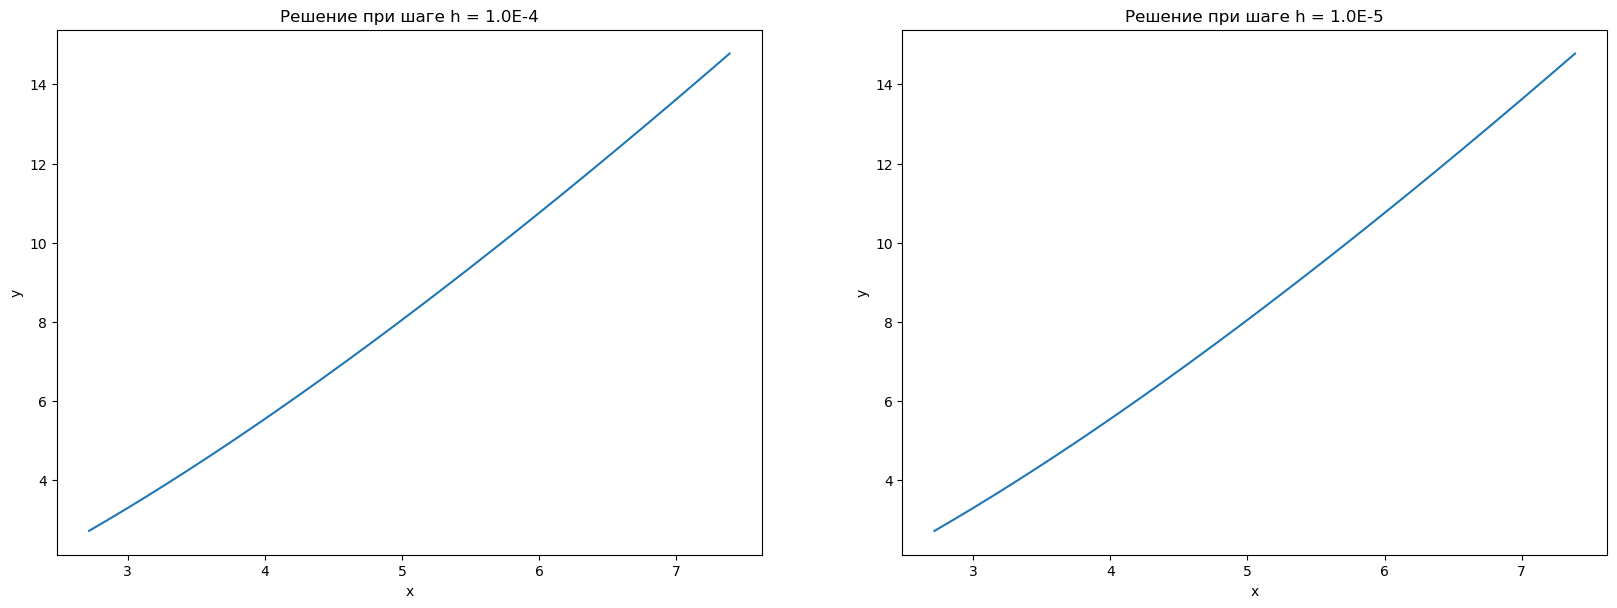

In [ ]:
x0 = np.e
x1 = np.e**2
y0 = np.e
psi = 2*np.e**2
exp = [3, 3.5, 4, 4.5, 6]

plt.figure(figsize = (20,15))
for j,step in enumerate([1e-4, 1e-5]):
    dots = np.arange(x0,x1,step)
    ind = []
    res = pristrelka(algo =koshi3)

    for i,x_n in enumerate(dots):
        for t in exp:
            if abs(x_n-t)< step/2:
                ind.append(i)
    print(f'решение в точках при h = {Decimal(step):.1E} ', res[ind])

    ax = plt.subplot(2, 2, j+1)
    ax.plot(dots, res)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title(f'Решение при шаге h = {Decimal(step):.1E}')

---
## T6

Вокруг Земли вращается спутник на круговой орбите радиуса $r_c = 10^4$ км. Проработав короткое время, двигатель сообщил спутнику скорость $u$ в направлении, противоположном движению.Рассчитайте новую траекторию спутника. При какой 𝑢 спутник коснётся поверхности Земли?

Уравнение движения спутника:
$$
\begin{gathered}
\ddot{x}=-\gamma \frac{M}{r^3} x, \quad \ddot{y}=-\gamma \frac{M}{r^3} y, \quad r=\sqrt{x^2+y^2}, \\
x(0)=r_c, \quad r_c=10^4 \text { км, } y(0)=0, \quad \dot{y}(0)=v_c-u, \dot{x}(0)=0 . \\
\end{gathered}
$$
$\text { Параметры задачи: } \quad M=5,99 \cdot 10^{24} \text { кг (масса Земли), }
\gamma=6,67 \cdot 10^{-11} \frac{\text { м }^3}{\text { кг } \cdot c^2}, \quad R=6380 \text { км (радиус Земли) }
$


Требуется найти такую $u$, что $r = R$

In [ ]:
x0 = 10**4
dx_0 = 0
y0 = 0
# dy_0 = v_c - u
m = 5.99*1e24
gamma = 6.67*1e-11


NameError: name 'v_c' is not defined

Задание. a) Построить график траектории в плоскости $(x, y)$.<br>
б) Проверить третий закон Кеплера: $T=\frac{2 \pi a^{3 / 2}}{\sqrt{\gamma M}}$ <br>
в) Провести исследования сходимости численного решения по сетке.

##  T7
Задача трех тел.
$$
\left\{\begin{array}{c}
\ddot{x}=2 \dot{y}+x-\frac{\eta(x+\mu)}{r_1^3}-\frac{\mu(x-\eta)}{r_2^3}-\nu \dot{x} \\
\quad\\
\ddot{y}=-2 \dot{x}+y-\frac{\eta y}{r_1^3}-\frac{\mu y}{r_2^3} - \nu \dot{y}
\end{array}\right.
$$
Здесь $\mu=\frac{1}{82,45}$ (отклонение масс Луны и Земли); Земля и Луна находятся в точках $(1-\mu, 0)$ и $(-\mu, 0)$ соответственно, масса спутника пренебрежимо мала по сравнению с массами Земли и Луны (координаты спутника $-(x, y))$; первые производные появляются вследствие вращения системы координат и трения, пропорционального скорости c коэффициентом пропорциональности $\nu$.
Параметры задачи:
$$
\begin{gathered}
\eta=1-\mu, \quad r_1^2=(x+\mu)^2+y^2, \quad r_2^2=(x-\eta)^2+y^2, \\
x(0)=1.2, \quad \dot{x}(0)=0, \quad y(0)=-1.05
\end{gathered}
$$
При $\nu=0$ периодическое движение с периодом $T \approx 6.2$.


Провести расчеты с $\nu = 0, 1/10, 1$ при 0 ≤ 𝑡 ≤ 8 вложенными методами Рунге-Кутты.

$$
\left\{\begin{array}{c}
\dot{x} = u\\
\quad\\
\dot{u}=2 \dot{y}+x-\frac{\eta(x+\mu)}{r_1^3}-\frac{\mu(x-\eta)}{r_2^3}-\nu u \\
\quad\\
\dot{y}=-2 u+y-\frac{\eta y}{r_1^3}-\frac{\mu y^2}{r_2^3}-\nu \dot{y}
\end{array}\right.
$$

$$
\left\{\begin{array}{c}
\dot{x} = u == f(t, x, u, y)\\
\quad\\
\dot{u}=\frac{2}{1+\nu} (-2 u+y-\frac{\eta y}{r_1^3}-\frac{\mu y^2}{r_2^3})+x-\nu u - \frac{\eta(x+\mu)}{r_1^3}-\frac{\mu(x-\eta)}{r_2^3} == g(t, x, u, y)\\
\quad\\
\dot{y}=\frac{1}{1+\nu} (-2 u+y-\frac{\eta y}{r_1^3}-\frac{\mu y^2}{r_2^3}) == q(t, x, u, y)
\end{array}\right.
$$

$$
g = 2* q +x-\frac{\eta(x+\mu)}{r_1^3}-\frac{\mu(x-\eta)}{r_2^3}-\nu u
$$

$$
x^{n+1} = x^n +  \frac{\tau}{8}(3k_1 + 2k_2 + 3k_3)\\
\quad\\
u^{n+1} = u^n + \frac{\tau}{8}(3m_1 + 2m_2 + 3m_3)\\
\quad\\
y^{n+1} = y^n + \frac{\tau}{8}(3p_1 + 2p_2 + 3p_3)\\
\quad \\
\quad\\
k_1 = f(t_n + \frac{\tau}{6}, x_n + \frac{\tau k_1}{6}, u_n + \frac{\tau m_1}{6}, y_n + \frac{\tau p_1}{6})\\
\quad\\
m_1 = g(t_n + \frac{\tau}{6}, x_n + \frac{\tau k_1}{6}, u_n + \frac{\tau m_1}{6}, y_n + \frac{\tau p_1}{6})\\
\quad\\
p_1 = q(t_n + \frac{\tau}{6}, x_n + \frac{\tau k_1}{6}, u_n + \frac{\tau m_1}{6}, y_n + \frac{\tau p_1}{6})\\
\quad \\
\quad\\
k_2 = f(t_n + \frac{\tau}{2}, x_n + \frac{\tau k_2}{2}, u_n + \frac{\tau m_2}{2}, y_n + \frac{\tau p_2}{2})\\
\quad\\
m_2 = g(t_n + \frac{\tau}{2}, x_n + \frac{\tau k_2}{2}, u_n + \frac{\tau m_2}{2}, y_n + \frac{\tau p_2}{2})\\
\quad\\
p_2 = q(t_n + \frac{\tau}{2}, x_n + \frac{\tau k_2}{2}, u_n + \frac{\tau m_2}{2}, y_n + \frac{\tau p_2}{2})\\
\quad \\
\quad\\
k_3 = f(t_n + \frac{5\tau}{6}, x_n + \frac{\tau}{18}(5k_1-8k_2 + 16k_3), \\
 \quad\quad\quad\quad\quad u_n + \frac{\tau }{18}(5m_1-8m_2 + 16m_3),  \\
 \quad\quad\quad\quad\quad y_n + \frac{\tau }{18}(5p_1-8p_2 + 16p_3))\\
 \quad\\
m_3 = g(t_n + \frac{5\tau}{6}, x_n + \frac{\tau}{18}(5k_1-8k_2 + 16k_3), \\
 \quad\quad\quad\quad\quad u_n + \frac{\tau }{18}(5m_1-8m_2 + 16m_3),  \\
 \quad\quad\quad\quad\quad y_n + \frac{\tau }{18}(5p_1-8p_2 + 16p_3))\\
 \quad\\
p_3 = q(t_n + \frac{5\tau}{6}, x_n + \frac{\tau}{18}(5k_1-8k_2 + 16k_3), \\
 \quad\quad\quad\quad\quad u_n + \frac{\tau }{18}(5m_1-8m_2 + 16m_3),  \\
 \quad\quad\quad\quad\quad y_n + \frac{\tau }{18}(5p_1-8p_2 + 16p_3))\\
$$

Где для каждого из наборов ${k_i, m_i, p_i}$ будем решать систему нелинейных уравнений методом Ньютона <br>
Визуализируем картину ожидаемого решения (из пакета)

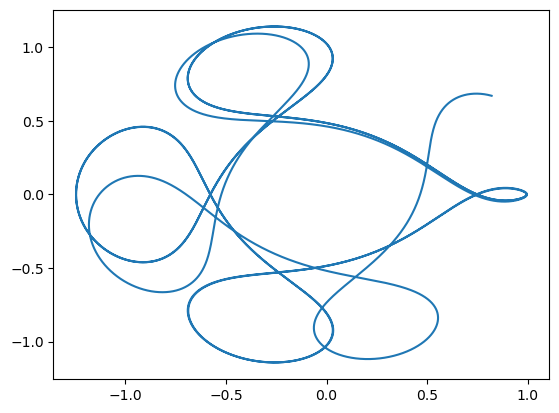

In [4]:
from scipy.integrate import odeint

mu = 0.012277471
eta = 1 - mu

r1_3 = lambda x, y: ((x + mu)**2 + y**2) **(3/2)
r2_3 = lambda x, y: ((x - eta)**2 + y**2) **(3/2)

f1 = lambda x, u, y, v: u
f2 = lambda x, u, y, v: x + 2*v - eta*((x+mu)/r1_3(x,y)) - mu*((x-eta)/r2_3(x,y))
f3 = lambda x, u, y, v: v
f4 = lambda x, u, y, v: y - 2*u - eta*(y/r1_3(x,y)) - mu*(y/r2_3(x,y))

f = lambda u,t: np.array([f(u[0], u[1], u[2], u[3]) for f in [f1, f2, f3, f4]])
u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

xs = np.linspace(0, 17*3, 30000000)
us = odeint(f, u0, xs)
plt.plot(us[:, 0], us[:, 2])
None

In [16]:
r1_3 = lambda x, y: ((x + mu)**2 + y**2) **(3/2)
r2_3 = lambda x, y: ((x - eta)**2 + y**2) **(3/2)

f = lambda x,u,y, coef: u - coef[0]
g = lambda x,u,y, coef: 2*(-2*u + y - eta*y/r1_3(x,y) - mu* y/r2_3(x,y))/(1+nu) + x -nu*u -eta*(x+mu)/r1_3(x,y) - mu*(x-eta)/r2_3(x,y)- coef[1]
q = lambda x,u,y, coef: (-2*u + y - eta*y/r1_3(x,y) - mu* y/r2_3(x,y))/(1+nu) - coef[2]

def func(x, u, y, coef):
    global mu, eta, nu, tau, eps

    return np.array([f(x,u,y,coef), g(x,u,y,coef), q(x,u,y,coef)])


def newton(x, u, y, jacob, i, coef = np.array([1.,1.,1.]), coef_prev = None):
    global mu, eta, nu, tau, eps

    prev = coef.copy()
    if jacob != 'jacob_3':
        x += i * tau * coef[0]
        u += i * tau * coef[1]
        y += i * tau * coef[2]
        
        coef -= np.linalg.inv(j(x, u, y, i)) @ func(x, u, y, coef)

        if (np.abs(coef - prev) < eps).all():
            return coef
        else:
           return newton(x, u, y, jacob, i, coef = coef)
    else:
        k1,k2 = coef_prev[0]
        m1,m2 = coef_prev[1]
        p1,p2 = coef_prev[2]

        i = 16/18
        x += tau * (5*k1 - 8*k2 + 16*coef[0]) / 18 
        u += tau * (5*m1 - 8*m2 + 16*coef[1]) / 18
        y += tau * (5*p1 - 8*p2 + 16*coef[2]) / 18  

        coef -= np.linalg.inv(j(x, u, y, i)) @ func(x, u, y, coef)

        if (np.abs(coef - prev) < eps).all():
            return coef
        else:
            return newton(x, u, y,jacob,i=16/18,coef = coef, coef_prev = coef_prev)

def j(x,u,y,i):
    global mu, eta, nu, tau

    df_k = lambda x,u,y,i: -1.
    df_m = lambda x,u,y,i: tau*i
    df_p = lambda x,u,y,i: 0

    dq_k = lambda x,u,y,i: tau*i * (3 * eta *y * (mu + x)/(((mu + x)**2 + y**2)**(5/2)) + 3 * mu* y *(x-eta)/(((x-eta)**2 + y**2)**(5/2))) / (1+nu)
    dq_m = lambda x,u,y,i: -tau*i *2 / (1 + nu)
    dq_p = lambda x,u,y,i: tau*i * (1 - eta*(mu**2 + 2*mu*x + x**2 - 2* y**2) / (((x+mu)**2 + y**2)**(5/2)) - mu* ((eta -x)**2 - 2*y**2) / (((eta - x)**2 + y**2)**(5/2)) ) / (1+nu) - 1

    dg_k = lambda x,u,y,i: 2*dq_k(x,u,y,i) + tau * i * (1 - eta*(-2*mu**2 -4*mu*x - 2 * x**2 + y **2) / (((mu + x)**2 + y**2)**(5/2)) - mu*(y**2 - 2*(x-eta)**2)/(((x-eta)**2 + y**2)**(5/2)))
    dg_m = lambda x,u,y,i: 2*dq_m(x,u,y,i) - i*tau*nu - 1
    dg_p = lambda x,u,y,i: 2*(dq_p(x,u,y,i) + 1) + i*tau*3 * (y*eta*(x + mu)/(((mu+x)**2 + y**2 )**(5/2)) + mu*y*(x-eta)/(((eta -x)**2 + y**2)**(5/2))) #- 2*mu*(2*y* (eta-x)**2 - 4*y**3 )/((1+nu)* ((eta-x)**2+y**2)**4 )  )

    return np.array([[df_k(x, u, y, i), df_m(x, u, y, i), df_p(x, u, y, i)],
                    [dg_k(x, u, y, i), dg_m(x, u, y, i), dg_p(x, u, y, i)],
                    [dq_k(x, u, y, i), dq_m(x, u, y, i), dq_p(x, u, y, i)]])


def chain(x, u, y):
    global mu, eta, nu, tau
    k1,m1,p1 = newton(x, u, y, 'jacob_1', i = 1/6, coef = np.array([1.,1.,1.]))
    k2,m2,p2 = newton(x, u, y, 'jacob_2', i = 1/2, coef = np.array([1., 1., 1.]))
    k3,m3,p3 = newton(x, u, y, 'jacob_3', i = 16/18, coef = np.array([k2,m2,p2]), coef_prev=np.array([[k1,k2],[m1,m2],[p1,p2]]))
    #c этими начальными коэффициентами Ньютон для третьих хотя бы сходится
    return np.array([k1,k2,k3]), np.array([m1,m2,m3]), np.array([p1,p2,p3])



def rk(val, max_time):
    global tau

    N = int(max_time/tau)

    res = [val]

    for j in tqdm(range(N)):
        x,u,y = val[0], val[1], val[2]
        k, m, p= chain(x,u,y)

        val[0] += tau*(3*k[0] + 2*k[1] + 3*k[2]) /8
        val[1] += tau*(3*m[0] + 2*m[1] + 3*m[2]) /8
        val[2] += tau*(3*p[0] + 2*p[1] + 3*p[2]) /8
        res.append([val[0], val[1], val[2]])

        
    return res

In [17]:
mu = 1/84.45
eta = 1-mu
x0 = 0.994
u0 = 0
y0 = -1.05
nu = 1
eps = 1e-5
tau = 1e-5
t_max = 20

# res = rk([x0,u0,y0], t_max)



N = int(t_max/tau)
val = [x0,u0,y0]
res = [val]

for l in tqdm(range(N)):
    x,u,y = val[0], val[1], val[2]
    k, m, p= chain(x,u,y)

    val[0] += tau*(3*k[0] + 2*k[1] + 3*k[2]) /8
    val[1] += tau*(3*m[0] + 2*m[1] + 3*m[2]) /8
    val[2] += tau*(3*p[0] + 2*p[1] + 3*p[2]) /8
    res.append([val[0], val[1], val[2]])



 62%|██████▏   | 1230447/1999999 [07:19<04:34, 2801.95it/s]


RecursionError: maximum recursion depth exceeded while calling a Python object

Тут хоть и были проблемы с рекурсией, из за того что коэффициенте в методе Ньютона не сходились на сетке данного масштаба, часть результатов посчиталась, ее и визуализируем <br>
__Решение при nu ==1:__

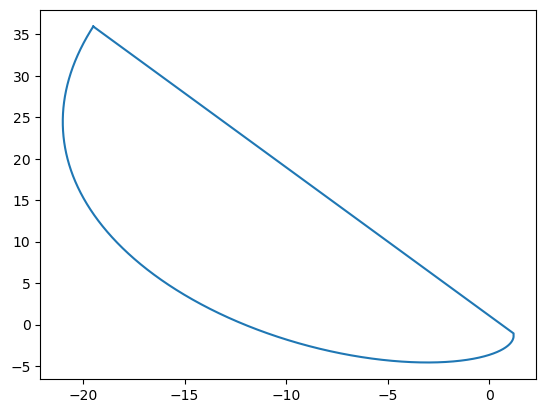

In [18]:
plt.plot([val[0] for val in res], [val[2] for val in res])
None

In [19]:
mu = 0.012277471
eta = 1 - mu

nu = 0 ####
eps = 1e-5
tau = 1e-5
t_max = 20

eta = 1 - mu
nu = 1

# res = rk([x0,u0,y0], t_max)
# plt.plot([val[0] for val in res], [val[2] for val in res])
# None

N = int(t_max/tau)
val = [0.994, 0, 0, -2.00158510637908252240537862224]
res = [val]

for l in tqdm(range(N)):
    x,u,y = val[0], val[1], val[2]
    k, m, p= chain(x,u,y)

    val[0] += tau*(3*k[0] + 2*k[1] + 3*k[2]) /8
    val[1] += tau*(3*m[0] + 2*m[1] + 3*m[2]) /8
    val[2] += tau*(3*p[0] + 2*p[1] + 3*p[2]) /8
    res.append([val[0], val[1], val[2]])


 58%|█████▊    | 1154792/1999999 [06:47<04:58, 2836.23it/s]


RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
res = np.array(res)
plt.plot(res[:, 0], res[:, 2])
None

In [20]:
mu = 1/84.45
eta = 1-mu
x0 = 1.2
u0 = 0
y0 = -1.05
nu = 1/10 ####
eps = 1e-5
tau = 1e-5
t_max = 30

# res = rk([x0,u0,y0], t_max)
plt.plot([val[0] for val in res], [val[2] for val in res])
None

  1%|          | 25821/2999999 [00:09<19:05, 2597.41it/s]


KeyboardInterrupt: 

* Попробуем решить методом Дорманда - Принса <br>
Это явный метод, но с хорошей сходимостью

In [5]:
def func(t,u):
    global mu,eta,nu
    x, u, y, v = u
    return np.array([f1(x, u, y, v), f2(x, u, y, v), f3(x, u, y, v), f4(x, u, y, v)])

    
def dormand_prince(func, t, u, h):
    k1 = h * func(t, u)
    k2 = h * func(t + (1/5)*h, u + (1/5)*k1)
    k3 = h * func(t + (3/10)*h, u + (3/40)*k1 + (9/40)*k2)
    k4 = h * func(t + (4/5)*h, u + (44/45)*k1 - (56/15)*k2 + (32/9)*k3)
    k5 = h * func(t + (8/9)*h, u + (19372/6561)*k1 - (25360/2187)*k2 + (64448/6561)*k3 - (212/729)*k4)
    k6 = h * func(t + h, u + (9017/3168)*k1 - (355/33)*k2 - (46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5)
    k7 = h * func(t + h, u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6)

    y = u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6
    z = u + (5179/57600)*k1 + (7571/16695)*k3 + (393/640)*k4 - (92097/339200)*k5 + (187/2100)*k6 + (1/40)*k7
    
    return z


r1_3 = lambda x, y: ((x + mu)**2 + y**2) **(3/2)
r2_3 = lambda x, y: ((x - eta)**2 + y**2) **(3/2)

# f = lambda x,u,y: u
# g = lambda x,u,y: 2*(-2*u + y - eta*y/r1_3(x,y) - mu* y/r2_3(x,y))/(1+nu) + x-nu*u -eta*(x+mu)/r1_3(x,y) - mu*(x-eta)/r2_3(x,y)
# q = lambda x,u,y: (-2*u + y - eta*y/r1_3(x,y) - mu* y/r2_3(x,y))/(1+nu)


mu = 0.012277471
eta = 1 - mu

f1 = lambda x, u, y, v: u
f2 = lambda x, u, y, v: x + 2*v - eta*((x+mu)/r1_3(x,y)) - mu*((x-eta)/r2_3(x,y))
f3 = lambda x, u, y, v: v
f4 = lambda x, u, y, v: y - 2*u - eta*(y/r1_3(x,y)) - mu*(y/r2_3(x,y))

In [6]:
mu = 0.012277471
eta = 1 - mu
nu = 1

u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

eps = 1e-5
t = 0
max_time = 20
h = 1e-5
N = int(max_time/h)

res_dp = [u0]
u = u0

for j in tqdm(range(N)):
    u = dormand_prince(func, t, u, h)
    res_dp.append(u)
    t += h



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1999999/1999999 [04:14<00:00, 7869.44it/s]


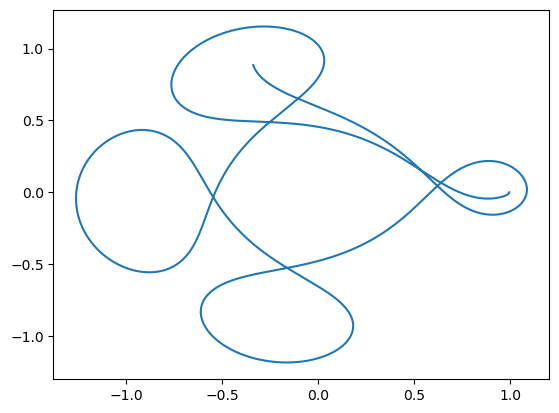

In [7]:
res_dp = np.array(res_dp)
plt.plot(res_dp[:, 0], res_dp[:, 2])
None

In [9]:
mu = 0.012277471
eta = 1-mu
nu = 1/10 ######


u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

eps = 1e-5
t = 0
max_time = 20
h = 1e-5
N = int(max_time/h)

res_dp = [u0]
u = u0

for j in tqdm(range(N)):
    u = dormand_prince(func, t, u, h)
    res_dp.append(u)
    t += h


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1999999/1999999 [04:07<00:00, 8083.49it/s]


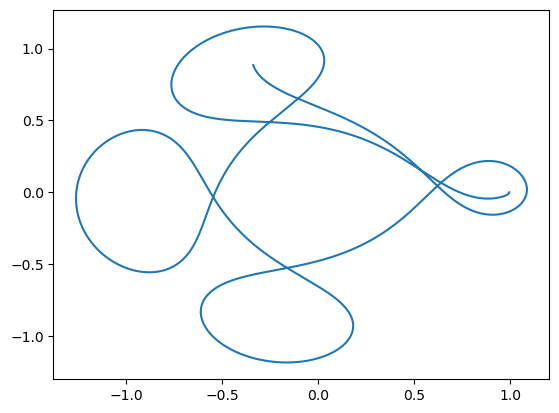

In [10]:
res_dp = np.array(res_dp)
plt.plot(res_dp[:, 0], res_dp[:, 2])
None

In [13]:
mu = 0.012277471
eta = 1-mu
nu = 0 ######

u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

eps = 1e-5
t = 0
max_time = 17*2
h = 1e-5
N = int(max_time/h)

res_dp = [u0]
u = u0

for j in tqdm(range(N)):
    u = dormand_prince(func, t, u, h)
    res_dp.append(u)
    t += h



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3399999/3399999 [09:58<00:00, 5679.29it/s]


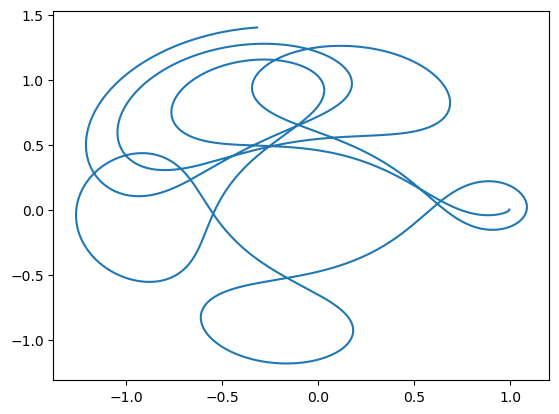

In [14]:
res_dp = np.array(res_dp)
plt.plot(res_dp[:, 0], res_dp[:, 2])
None